In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [77]:
dataDir='data/tiny_set'
annFile=f'{dataDir}/annotations/tiny_set_train.json'

In [78]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [79]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
sea_person earth_person

COCO supercategories: 
person


In [80]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['sea_person', 'earth_person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [10])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [81]:
img

{'file_name': 'labeled_images/bb_V0033_I0009840.jpg',
 'height': 1080,
 'width': 1920,
 'id': 10}

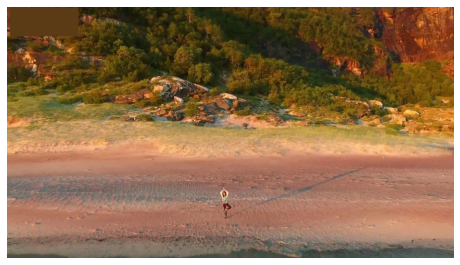

In [82]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread( f"{dataDir}/train/{img['file_name']}")
plt.axis('off')
plt.imshow(I)
plt.show()

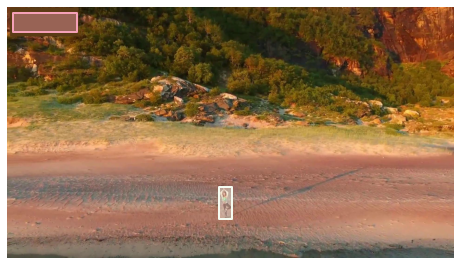

In [83]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)